In [ ]:
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep
from tqdm.notebook import tqdm
import os
sns.set()
from tensorflow import keras

In [ ]:
data_dir= "/content/drive/MyDrive/prep kaggle/"
Data_dir=os.path.join(data_dir,"Dataset")

In [ ]:
os.listdir(Data_dir)

['Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented', 'Mild_Demented']

['Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented', 'Mild_Demented']
[64, 3210, 2250, 896]


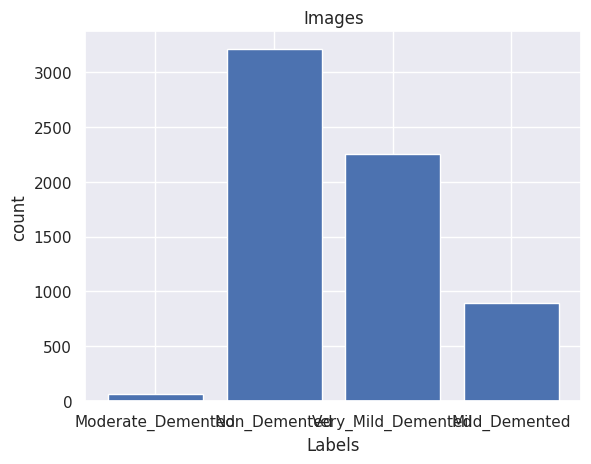

In [ ]:
import matplotlib.pyplot as plt
folder ="/content/drive/MyDrive/prep kaggle/Dataset"
img_count={}
for label in os.listdir(folder):
  label_path=os.path.join(folder,label)
  if os.path.isdir(label_path):
    img_count[label]=len(os.listdir(label_path))

labels=list(img_count.keys())
counts=list(img_count.values())
print(labels)
print(counts)

plt.bar(labels,counts)
plt.xlabel("Labels")
plt.ylabel("count")
plt.title("Images")
plt.show()


In [ ]:
"""import os
   import cv2

def convertImage(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for root, dirs, files in os.walk(input_folder):
      for filename in files:
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
          filename.= os.path.join(root, filename)
            img = cv2.imread(image_path)

            img=img/255.0
            img=resize(img,(128,128,3))
            img=np.reshape(img,(128,384))

            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

            relative_path = os.path.relpath(root, input_folder)
            output_subfolder = os.path.join(output_folder, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            # Save the image
            output_path = os.path.join(output_subfolder, filename)
            cv2.imwrite(output_path,img)

            print(f"Converted {filename}.")"""

'import os\nimport cv2\n\ndef convertImage(input_folder, output_folder):\n    if not os.path.exists(output_folder):\n        os.makedirs(output_folder)\n\n\n    for root, dirs, files in os.walk(input_folder):\n      for filename in files:\n        if filename.endswith(\'.jpg\') or filename.endswith(\'.jpeg\'):\n            print("file exists")\n            image_path = os.path.join(root, filename)\n            img = cv2.imread(image_path)\n           \n            img=img/255.0\n            img=resize(img,(128,128,3))\n            img=np.reshape(img,(128,384))\n           \n            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)\n\n            relative_path = os.path.relpath(root, input_folder)\n            output_subfolder = os.path.join(output_folder, relative_path)\n            os.makedirs(output_subfolder, exist_ok=True)\n\n            # Save the image\n            output_path = os.path.join(output_subfolder, filename)\n            cv2.imwrite(output_path,img)\n\n            print(f"C

In [ ]:
#input_folder = Data_dir
#output_folder = '/content/drive/MyDrive/prep kaggle/'
#convertImage(input_folder, output_folder)

**Augmentation**

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

def augment_images(input_folder, output_folder, augmentation_factor):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Create an instance of the ImageDataGenerator with desired augmentation settings
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Loop through all files in the input folder
    for root, dirs, files in os.walk(input_folder):
      for filename in files:
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            print("file exists")
            image_path = os.path.join(root, filename)
            img = image.load_img(image_path, target_size=(128, 128))
            x = image.img_to_array(img)
            x = x.reshape((1,) + x.shape)

            # Generate augmented images
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=output_folder, save_prefix='augmented_', save_format='jpg'):
                i += 1
                if i >= augmentation_factor:
                    break

            print(f"Augmented {filename} and saved {i} new images.")




In [ ]:
# Specify the input and output folders
input_folder= '/content/drive/MyDrive/prep kaggle/Dataset/Mild_Demented/'
output_folder = '/content/drive/MyDrive/prep kaggle/Dataset/Mild_Demented/'
# Specify the desired augmentation factor
augmentation_factor = 2 # Generate 5 augmented images per input image

# Call the augmentation function
augment_images(input_folder, output_folder, augmentation_factor)

file exists
Augmented mild_103.jpg and saved 2 new images.
file exists
Augmented mild_10.jpg and saved 2 new images.
file exists
Augmented mild_101.jpg and saved 2 new images.
file exists
Augmented mild.jpg and saved 2 new images.
file exists
Augmented mild_100.jpg and saved 2 new images.
file exists
Augmented mild_102.jpg and saved 2 new images.
file exists
Augmented mild_115.jpg and saved 2 new images.
file exists
Augmented mild_114.jpg and saved 2 new images.
file exists
Augmented mild_111.jpg and saved 2 new images.
file exists
Augmented mild_118.jpg and saved 2 new images.
file exists
Augmented mild_108.jpg and saved 2 new images.
file exists
Augmented mild_110.jpg and saved 2 new images.
file exists
Augmented mild_105.jpg and saved 2 new images.
file exists
Augmented mild_117.jpg and saved 2 new images.
file exists
Augmented mild_113.jpg and saved 2 new images.
file exists
Augmented mild_106.jpg and saved 2 new images.
file exists
Augmented mild_107.jpg and saved 2 new images.
fi

In [ ]:
import random
import shutil

folder_path="/content/drive/MyDrive/prep kaggle/Dataset/Very_Mild_Demented/"
output_path="/content/VMDemented50_new/"
percentage =0.5
if not os.path.exists(output_path):
        os.makedirs(output_path)

file_list=os.listdir(folder_path)
random.shuffle(file_list)

files_num=int(len(file_list)*percentage)
files_to_aug=file_list[:files_num]

for file_name in files_to_aug:
  if file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
      source_file=os.path.join(folder_path,file_name)
      destination_file=os.path.join(output_path,file_name)
      shutil.copyfile(source_file,destination_file)

In [ ]:
input_folder= '/content/VMDemented50_new'
output_folder = '/content/drive/MyDrive/prep kaggle/Dataset/Very_Mild_Demented/'
augmentation_factor = 2 # Generate 5 augmented images per input image

# Call the augmentation function
augment_images(input_folder, output_folder, augmentation_factor)

file exists
Augmented verymild_1222.jpg and saved 2 new images.
file exists
Augmented verymild_2190.jpg and saved 2 new images.
file exists
Augmented verymild_157.jpg and saved 2 new images.
file exists
Augmented verymild_1953.jpg and saved 2 new images.
file exists
Augmented verymild_1516.jpg and saved 2 new images.
file exists
Augmented verymild_1169.jpg and saved 2 new images.
file exists
Augmented verymild_236.jpg and saved 2 new images.
file exists
Augmented verymild_549.jpg and saved 2 new images.
file exists
Augmented verymild_388.jpg and saved 2 new images.
file exists
Augmented verymild_1772.jpg and saved 2 new images.
file exists
Augmented verymild_730.jpg and saved 2 new images.
file exists
Augmented verymild_393.jpg and saved 2 new images.
file exists
Augmented verymild_1413.jpg and saved 2 new images.
file exists
Augmented verymild_744.jpg and saved 2 new images.
file exists
Augmented verymild_1490.jpg and saved 2 new images.
file exists
Augmented verymild_356.jpg and save

In [ ]:
import random
import shutil

folder_path="/content/drive/MyDrive/prep kaggle/Dataset/Non_Demented/"
output_path="/content/nonDemented50_new/"
percentage =0.2
if not os.path.exists(output_path):
        os.makedirs(output_path)

file_list=os.listdir(folder_path)
random.shuffle(file_list)

files_num=int(len(file_list)*percentage)
files_to_aug=file_list[:files_num]

for file_name in files_to_aug:
  if file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
      source_file=os.path.join(folder_path,file_name)
      destination_file=os.path.join(output_path,file_name)
      shutil.copyfile(source_file,destination_file)

In [ ]:
input_folder= '/content/nonDemented50_new'
output_folder = '/content/drive/MyDrive/prep kaggle/Dataset/Non_Demented/'
augmentation_factor = 2 # Generate 5 augmented images per input image

# Call the augmentation function
augment_images(input_folder, output_folder, augmentation_factor)

file exists
Augmented non_2956.jpg and saved 2 new images.
file exists
Augmented non_412.jpg and saved 2 new images.
file exists
Augmented non_1323.jpg and saved 2 new images.
file exists
Augmented non_3170.jpg and saved 2 new images.
file exists
Augmented non_1139.jpg and saved 2 new images.
file exists
Augmented non_2517.jpg and saved 2 new images.
file exists
Augmented non_1856.jpg and saved 2 new images.
file exists
Augmented non_1563.jpg and saved 2 new images.
file exists
Augmented non_733.jpg and saved 2 new images.
file exists
Augmented non_2205.jpg and saved 2 new images.
file exists
Augmented non_2392.jpg and saved 2 new images.
file exists
Augmented non_1455.jpg and saved 2 new images.
file exists
Augmented non_2191.jpg and saved 2 new images.
file exists
Augmented non_1848.jpg and saved 2 new images.
file exists
Augmented non_1182.jpg and saved 2 new images.
file exists
Augmented non_3031.jpg and saved 2 new images.
file exists
Augmented non_2019.jpg and saved 2 new images.

['Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented', 'Mild_Demented']
[64, 4408, 4264, 2556]


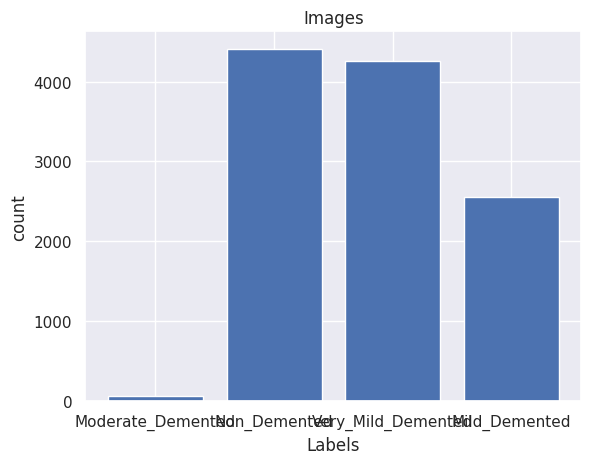

In [ ]:
import os
import matplotlib.pyplot as plt
folder ="/content/drive/MyDrive/prep kaggle/Dataset/"
img_count={}
for label in os.listdir(folder):
  label_path=os.path.join(folder,label)
  if os.path.isdir(label_path):
    img_count[label]=len(os.listdir(label_path))

labels=list(img_count.keys())
counts=list(img_count.values())
print(labels)
print(counts)
plt.bar(labels,counts)
plt.xlabel("Labels")
plt.ylabel("count")
plt.title("Images")
plt.show()


In [ ]:
def show_image(img, cmap='gray'):
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

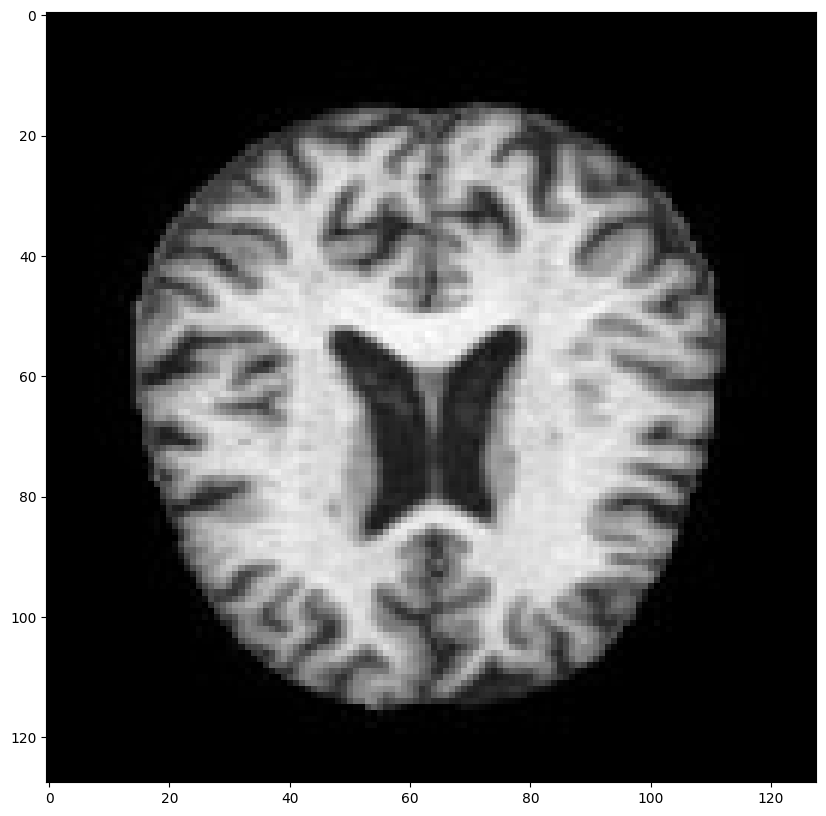

In [ ]:
#crop roi
import matplotlib.pyplot as plt
import cv2 as cv
test_img = cv.imread('/content/drive/MyDrive/prep kaggle/Dataset/Non_Demented/non_10.jpg')
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
show_image(test_img)


In [ ]:
width, height, dimension = test_img.shape
print(f'Width RGB = {width}')
print(f'Height RGB = {height}')
print(f'Dimension RGB = {dimension}')

Width RGB = 128
Height RGB = 128
Dimension RGB = 3


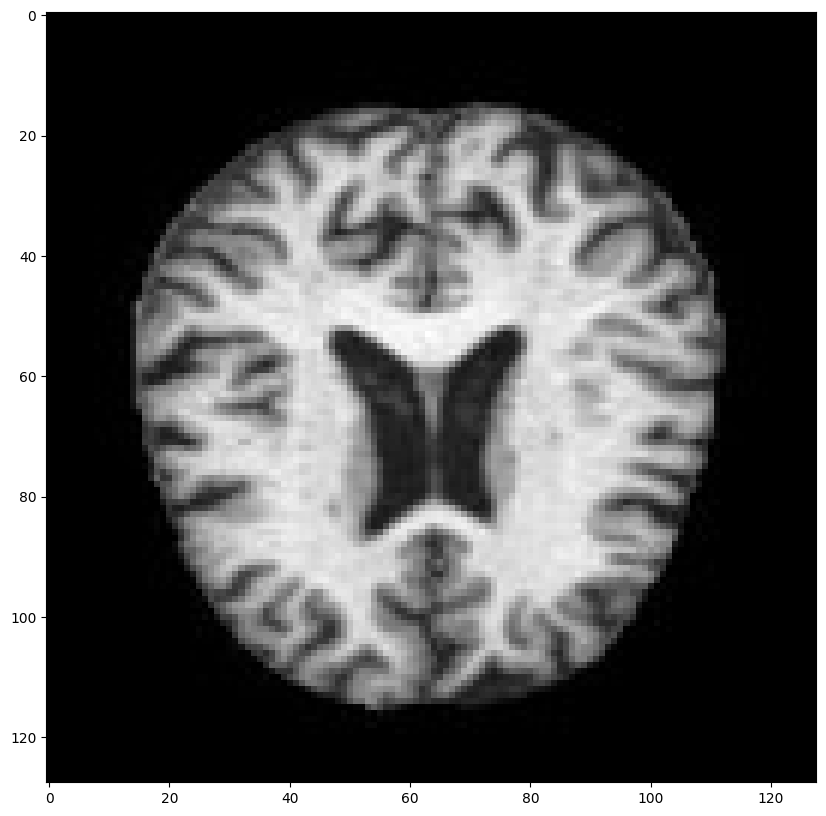

In [ ]:
test_img_gray = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
show_image(test_img_gray)

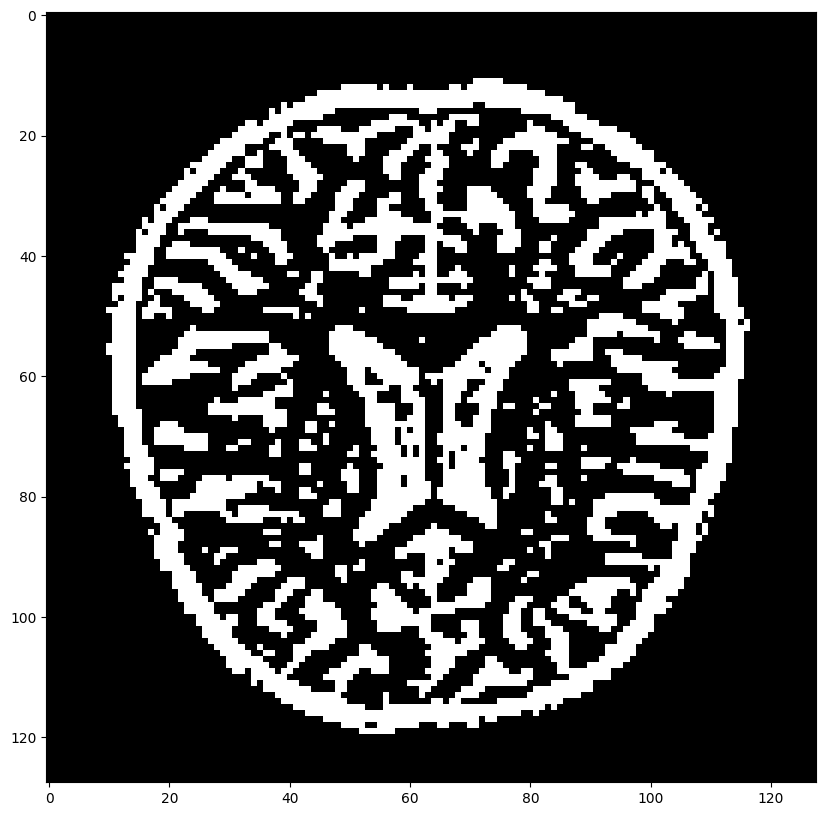

In [ ]:
test_img_thresh = cv.adaptiveThreshold(test_img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
show_image(test_img_thresh)

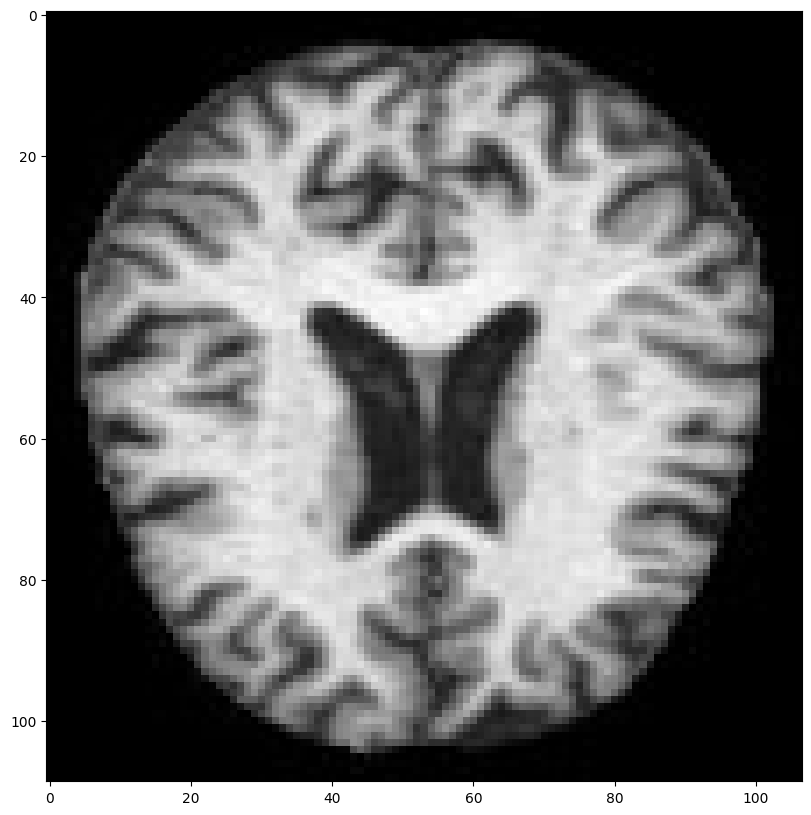

In [ ]:
cnts = cv.findContours(test_img_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv.contourArea, reverse=True)
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    test_img_ROI = test_img[y:y+h, x:x+w]
    break
show_image(test_img_ROI)

In [ ]:
width, height, dimension = test_img_ROI.shape
print(width)
print(height)
print(dimension)

109
107
3


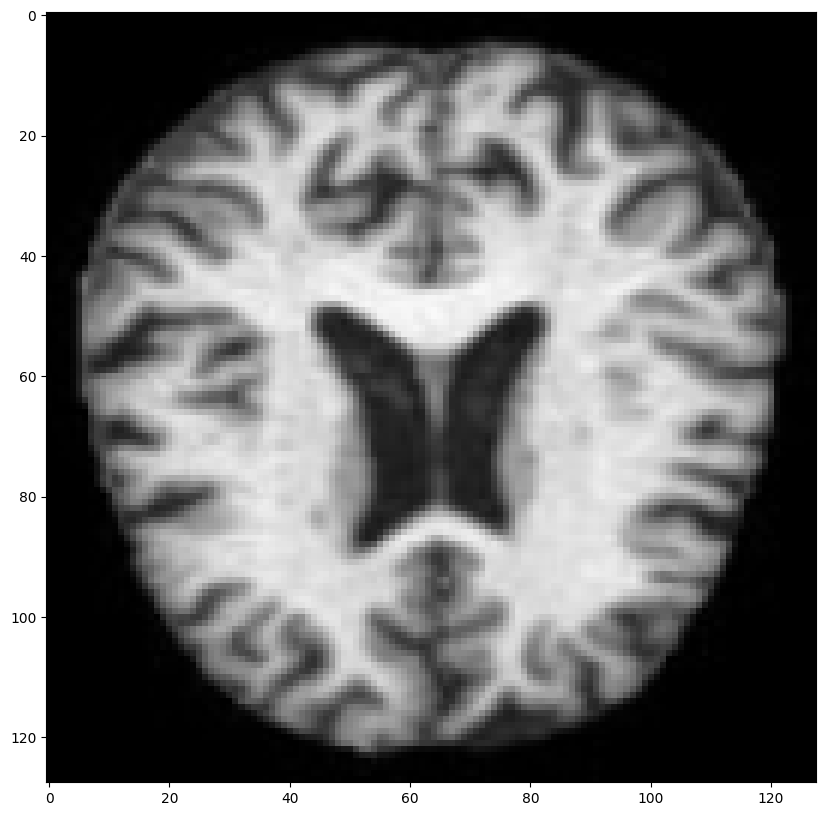

In [ ]:
test_img_ROI_resize=cv.resize(test_img_ROI, (128,128))
show_image(test_img_ROI_resize)

In [ ]:
width, height, dimension = test_img_ROI_resize.shape
print(width)
print(height)
print(dimension)

128
128
3


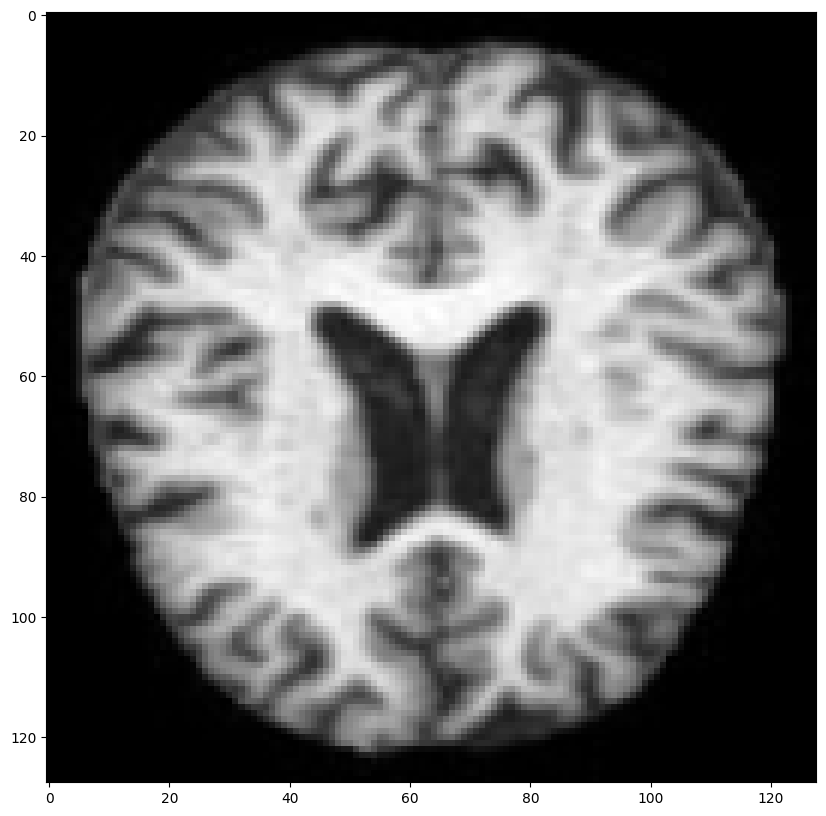

In [ ]:
test_img_ROI_resize_gray = cv.cvtColor(test_img_ROI_resize, cv.COLOR_RGB2GRAY)
show_image(test_img_ROI_resize_gray)

In [ ]:
from skimage.feature import graycomatrix, graycoprops
import numpy as np

In [ ]:
def glcm_feature(matrix_coocurrence, featureName):
    feature = graycoprops(matrix_coocurrence, featureName)
    result = np.average(feature)
    return result
distance = 1
teta = 0

contrast_test = []
homogeneity_test = []
energy_test = []
correlation_test = []


glcm = graycomatrix(test_img_ROI_resize_gray, [distance], [teta], levels=256, symmetric=True, normed=True)
contrast_test.append(glcm_feature(glcm, 'contrast'))
homogeneity_test.append(glcm_feature(glcm, 'homogeneity'))
energy_test.append(glcm_feature(glcm, 'energy'))
correlation_test.append(glcm_feature(glcm, 'correlation'))


print(f'Homogenity : {homogeneity_test[0]}')
print(f'Correlation : {correlation_test[0]}')
print(f'Energy : {energy_test[0]}')
print(f'Contrast : {contrast_test[0]}')

NameError: ignored

In [ ]:

def preprocessingImage(image):
    test_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    test_img_gray = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
    test_img_thresh = cv.adaptiveThreshold(test_img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
    cnts = cv.findContours(test_img_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)
    for c in cnts:
        x,y,w,h = cv.boundingRect(c)
        test_img_ROI = test_img[y:y+h, x:x+w]
        break
    test_img_ROI_resize = cv.resize(test_img_ROI, (width, height))
    test_img_ROI_resize_gray = cv.cvtColor(test_img_ROI_resize, cv.COLOR_RGB2GRAY)

    return test_img_ROI_resize_gray

In [ ]:
import os
import cv2

def convertImage(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for root, dirs, files in os.walk(input_folder):
        for filename in files:
            if filename.endswith('.jpg') or filename.endswith('.jpeg'):
                # Read the image
                image_path = os.path.join(root, filename)
                image = cv2.imread(image_path)
                prep_image=preprocessingImage(image)

                relative_path = os.path.relpath(root, input_folder)
                output_subfolder = os.path.join(output_folder, relative_path)
                os.makedirs(output_subfolder, exist_ok=True)

            # Save the image
            output_path = os.path.join(output_subfolder, filename)
            cv2.imwrite(output_path,prep_image)

            print(f"Converted {filename}.")

input_folder= data_dir
output_folder= "/content/drive/MyDrive/prep kaggle/Preprocessed/"
convertImage(input_folder,output_folder)

Streaming output truncated to the last 5000 lines.
Converted verymild_1957.jpg.
Converted verymild_1959.jpg.
Converted verymild_1968.jpg.
Converted verymild_196.jpg.
Converted verymild_1961.jpg.
Converted verymild_1958.jpg.
Converted verymild_1966.jpg.
Converted verymild_1970.jpg.
Converted verymild_197.jpg.
Converted verymild_1969.jpg.
Converted verymild_1972.jpg.
Converted verymild_198.jpg.
Converted verymild_1975.jpg.
Converted verymild_1971.jpg.
Converted verymild_1974.jpg.
Converted verymild_1976.jpg.
Converted verymild_1981.jpg.
Converted verymild_1978.jpg.
Converted verymild_1980.jpg.
Converted verymild_1979.jpg.
Converted verymild_1977.jpg.
Converted verymild_1973.jpg.
Converted verymild_1982.jpg.
Converted verymild_1986.jpg.
Converted verymild_1985.jpg.
Converted verymild_1993.jpg.
Converted verymild_1991.jpg.
Converted verymild_1992.jpg.
Converted verymild_1988.jpg.
Converted verymild_199.jpg.
Converted verymild_1987.jpg.
Converted verymild_1984.jpg.
Converted verymild_1990.j

In [ ]:
nonD =

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
import cv2
import pandas as pd
from skimage.feature import graycomatrix, graycoprops

from PIL import Image

def glcm_feature(matrix_coocurrence, featureName):
    feature = graycoprops(matrix_coocurrence, featureName)[0,0]
    result = np.average(feature)
    return result


distance = 1
teta = [0]
categories={'Non_Demented':0,'Very_Mild_Demented':1, 'Mild_Demented':2}
data={'contrast':[],'homogeneity':[],'energy':[],'correlation':[],
      'dissimilarity':[],'ASM':[],'entropy':[],'cluster_shade':[],
      'label':[]}


folder_path="/content/drive/MyDrive/prep kaggle/Preprocessed/Dataset/"


for category in categories:
  category_folder =os.path.join(folder_path,category)
  for filename in os.listdir(category_folder):
    if filename.endswith('.jpg'):
      file_path=os.path.join(category_folder, filename)

      image = Image.open(file_path)


      glcm = graycomatrix(image, [distance], teta, levels=256, symmetric=True, normed=True)

      contrast=glcm_feature(glcm, 'contrast')
      #entropy=glcm_feature(glcm,'entropy')
      dissimilarity=glcm_feature(glcm,'dissimilarity')
      ASM=glcm_feature(glcm,'ASM')
      homogeneity=glcm_feature(glcm, 'homogeneity')
      energy=glcm_feature(glcm, 'energy')
      correlation=glcm_feature(glcm, 'correlation')

      entropy=np.sum(glcm * np.log2(glcm + np.finfo(float).eps))
      cluster_shade = np.sum(((contrast + energy)-(2 * homogeneity))**3)

      data['contrast'].append(contrast)
       #data['entropy'].append(entropy)
      data['homogeneity'].append(homogeneity)
      data['energy'].append(energy)
      data['correlation'].append(correlation)
      data['entropy'].append(entropy)
      data['cluster_shade'].append(cluster_shade)

      data['dissimilarity'].append(dissimilarity)
      data['ASM'].append(ASM)
      data['label'].append(categories[category])




In [ ]:
data_df=pd.DataFrame(data)
data_df.to_csv("/content/Features.csv",index="False")

NameError: ignored